<h2>Import the necessary Library</h2>

In [ ]:
# Import necessary libraries
import pandas as pd  # Pandas for data handling
import numpy as np    # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting

<h2>Read the features from file</h2>

In [ ]:

# Load the dataset from the CSV file
df = pd.read_csv("face_mimic_df.csv")

# Define the list of features to be used for analysis
feats = ['AU_01_t12','AU_06_t12','AU_12_t12','AU_04_t13','AU_07_t13','AU_09_t13','AU_01_t14','AU_02_t14','AU_04_t14']

# Extract the feature columns from the dataset and remove rows with missing values
X = df[feats].dropna()

# Extract the target variable (diagnosed) and remove rows with missing values
y = df['diagnosed'].dropna()

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution
X_resampled, y_resampled = SMOTE().fit_resample(X, y)


<h2>Run Statistical Analysis</h2>

In [ ]:
# Initialize an empty dictionary to store the results
result = dict()
result['feature'] = []  # List to store feature names
result['mean PD'] = []  # List to store mean values for the 'diagnosed' class
result['mean nPD'] = []  # List to store mean values for the 'not diagnosed' class
result['sd PD'] = []  # List to store standard deviations for the 'diagnosed' class
result['sd nPD'] = []  # List to store standard deviations for the 'not diagnosed' class
result['p'] = []  # List to store p-values from the Mann-Whitney U test
result['u'] = []  # List to store U-statistics from the Mann-Whitney U test

# Loop through each feature in the 'feats' list
for f in feats:
    # Extract data for the 'diagnosed' class and remove rows with missing values
    pd_df = df[df['diagnosed'] == 1][f].dropna()

    # Extract data for the 'not diagnosed' class and remove rows with missing values
    npd_df = df[df['diagnosed'] == 0][f].dropna()

    # Append feature name to the 'feature' list
    result['feature'].append(f)

    # Calculate and append the mean for the 'diagnosed' class
    result['mean PD'].append(pd_df.mean())

    # Calculate and append the mean for the 'not diagnosed' class
    result['mean nPD'].append(npd_df.mean())

    # Calculate and append the standard deviation for the 'diagnosed' class
    result['sd PD'].append(pd_df.std())

    # Calculate and append the standard deviation for the 'not diagnosed' class
    result['sd nPD'].append(npd_df.std())

    # Perform the Mann-Whitney U test to compare the two groups and append the U-statistic
    result['u'].append(mannwhitneyu(pd_df, npd_df)[0])

    # Perform the Mann-Whitney U test to compare the two groups and append the p-value
    result['p'].append(mannwhitneyu(pd_df, npd_df)[1])

# Create a pandas DataFrame from the 'result' dictionary
result = pd.DataFrame(result)

# Set the display format for float values
pd.options.display.float_format = "{:,.3f}".format


,feature,mean PD,mean nPD,sd PD,sd nPD,p,u
0,AU_01_t12,0.145,0.074,0.182,0.119,0.001,"6,006.000"
1,AU_06_t12,0.171,0.247,0.152,0.250,0.047,"7,409.000"
2,AU_12_t12,0.211,0.273,0.179,0.243,0.065,"7,556.000"
3,AU_04_t13,0.187,0.262,0.199,0.316,0.063,"7,539.000"
4,AU_07_t13,0.187,0.242,0.205,0.268,0.103,"7,774.000"
5,AU_09_t13,0.042,0.041,0.060,0.066,0.267,"8,335.000"
6,AU_01_t14,0.279,0.266,0.283,0.317,0.172,"8,052.500"
7,AU_02_t14,0.151,0.121,0.288,0.177,0.144,"7,949.000"
8,AU_04_t14,0.307,0.398,0.370,0.431,0.061,"7,525.000"


<h2>Linear Regression Analysis</h2>

Optimization terminated successfully.
         Current function value: 0.622597
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  960
Model:                          Logit   Df Residuals:                      951
Method:                           MLE   Df Model:                            8
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:                  0.1018
Time:                        01:43:30   Log-Likelihood:                -597.69
converged:                       True   LL-Null:                       -665.42
Covariance Type:            nonrobust   LLR p-value:                 2.086e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4524      0.086      

<ipython-input-7-fff0ef16dedd>:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(np.arange(9),results.params,color = 'gbgggbbbb')
<ipython-input-7-fff0ef16dedd>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(np.arange(9),results.params,color = 'ggggbbbbb')


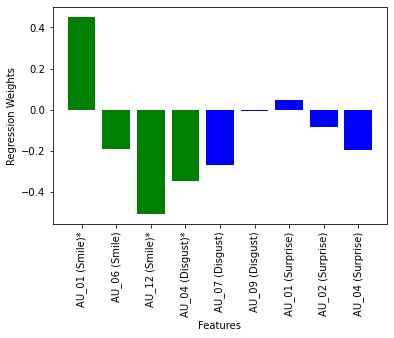

In [ ]:
# Define the list of features to be used for analysis
feats = ['AU_01_t12','AU_06_t12','AU_12_t12','AU_04_t13','AU_07_t13','AU_09_t13','AU_01_t14','AU_02_t14','AU_04_t14']

# Extract the feature columns from the dataset and remove rows with missing values
X = df[feats].dropna()

# Extract the target variable (diagnosed) and remove rows with missing values
y = df['diagnosed'].dropna()

# Standardize the feature data using the 'scale' function to have mean=0 and standard deviation=1
X = scale(X)

# Convert the target variable 'y' into a NumPy array
y = np.array(y)

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# Fit a logistic regression model using statsmodels' Logit function with the 'bfgs' optimization method
results = sm.Logit(y_resampled, X_resampled).fit(method='bfgs')

# Print the summary of the logistic regression results
print(results.summary())

# Get the number of parameters in the regression model
print(len(results.params))

# Define feature names for plotting
feat_names = ['AU_01 (Smile)*','AU_06 (Smile)','AU_12 (Smile)*','AU_04 (Disgust)*','AU_07 (Disgust)', 'AU_09 (Disgust)',\
              'AU_01 (Surprise)','AU_02 (Surprise)','AU_04 (Surprise)']

# Create a bar plot of regression weights
plt.bar(np.arange(9),results.params,color = 'gbgggbbbb')
plt.bar(np.arange(9),results.params,color = 'ggggbbbbb')
plt.xlabel("Features")
plt.ylabel("Regression Weights")
plt.xticks(np.arange(9),feat_names,rotation=90)
plt.savefig("Regression_weights.png",bbox_inches='tight',dpi = 300)
plt.show()


<h2>Classification</h2>

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from collections import Counter

# Define the list of features to be used for analysis
feats = ['AU_01_t12','AU_06_t12','AU_12_t12','AU_04_t13','AU_07_t13', 'AU_09_t13','AU_01_t14','AU_02_t14','AU_04_t14']

# Extract the feature columns from the dataset and remove rows with missing values
X = df[feats].dropna()

# Extract the target variable (diagnosed) and remove rows with missing values
y = df['diagnosed'].dropna()

# Standardize the feature data using the 'scale' function to have mean=0 and standard deviation=1
X = scale(X)

# Convert the target variable 'y' into a NumPy array
y = np.array(y)

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# Initialize variables to store the best performance metrics
best_auc = 0
best_f1 = 0
best_acc = 0
best_pre = 0
best_re = 0

# Loop through different values of C and gamma for the SVM classifier
for c in np.arange(0.1, 10, 2):
    for g in np.arange(0.1, 2, 0.05):
        # Create an SVM classifier with the specified kernel, C, and gamma values
        clf = svm.SVC(kernel='rbf', C=c, gamma=g).fit(X_resampled, y_resampled)

        # Use cross-validation to make predictions and evaluate performance metrics
        y_pred = cross_val_predict(clf, X_resampled, y_resampled, cv=10)

        # Calculate accuracy, AUC, F1-score, precision, and recall
        acc = accuracy_score(y_resampled, y_pred)
        auc = roc_auc_score(y_resampled, y_pred)
        f1 = f1_score(y_resampled, y_pred)
        pre = precision_score(y_resampled, y_pred)
        re = recall_score(y_resampled, y_pred)

        # Update the best performance metrics if the current model performs better
        if auc > best_auc:
            best_auc = auc
            best_f1 = f1
            best_acc = acc
            best_pre = pre
            best_re = re

# Print the best performance metrics
print(best_acc, best_f1, best_auc, best_pre, best_re)



0.9541666666666667 0.9539748953974896 0.9541666666666667 0.957983193277311 0.95


<Figure size 432x288 with 0 Axes>